# Annotations

## Titles

## Labels

## Text labels

`geom_text()` adds labels at the specified x and y positions. 

### Aesthetics

- `family=fontName`. Recommended fonts are: "sans", "serif", "mono"
- `fontface=Face`. Possible faces are: "plain", "bold", "italic"
- `hjust` and `vjust`, to adjust the alignment.
    - `hjust`: "left", "center", "right", "inward", "outward"
    - `vjust`: "bottom", "middle", "top", "inward", "outward"
- `size=sizeNum`, for font size.
- `angle=angleDegree`, for rotation of the text.

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180, width=0) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    if (width>0){
        options(repr.plot.width=width, repr.plot.height=2*max(numPlots%/%ncol,1), repr.plot.res=res)
    } else{
        options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(numPlots%/%ncol,1), repr.plot.res=res)   
    }

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8))
)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


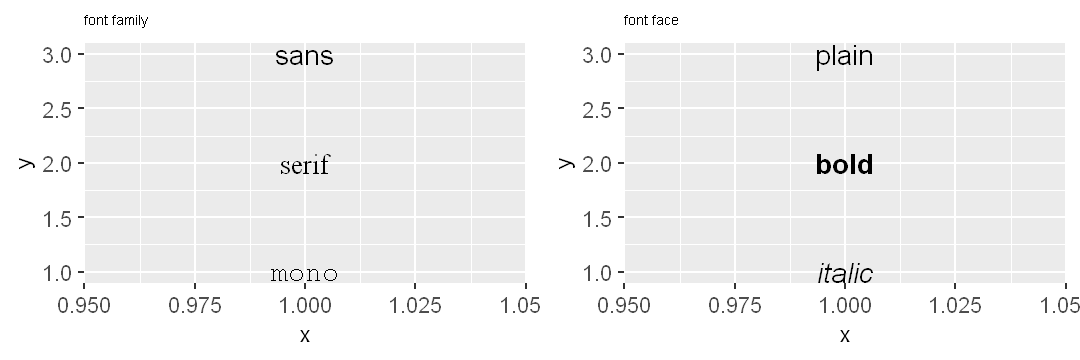

In [2]:
df <- data.frame(x = 1, y = 3:1, family = c("sans", "serif", "mono"))
p1 <- ggplot(df, aes(x, y)) + 
geom_text(aes(label = family, family = family)) + 
ggtitle("font family") + myTheme

df <- data.frame(x = 1, y = 3:1, face = c("plain", "bold", "italic"))
p2 <- ggplot(df, aes(x, y)) + 
geom_text(aes(label = face, fontface = face)) + 
ggtitle("font face") + myTheme

multiplot(p1,p2,ncol = 2)

Using system font can be tricky for different graphics devices of each system.

- Windows: `windows()`
- Macs: `quartz()`
- Linux: `x11()`
- RSudio: `RStudioGD()`
- files: `png()` and `pdf()`

Two better solutions are to use package `showtext`, or `extrafont`.

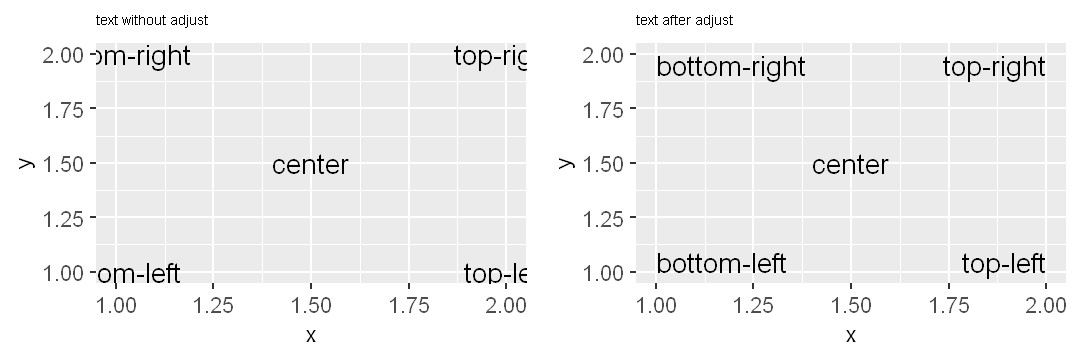

In [3]:
df <- data.frame(
    x = c(1, 1, 2, 2, 1.5),
    y = c(1, 2, 1, 2, 1.5),
    text = c(
        "bottom-left", "bottom-right", 
        "top-left", "top-right", "center"
    )
)
p1 <- ggplot(df, aes(x, y)) +
geom_text(aes(label = text)) + 
ggtitle("text without adjust") + myTheme
p2 <- ggplot(df, aes(x, y)) +
geom_text(aes(label = text), vjust = "inward", hjust = "inward") + 
ggtitle("text after adjust") + myTheme

multiplot(p1,p2,ncol = 2)

### Parameters

- `nudge_x` and `nudge_y`: move the label a little bit
- `check_overlap` for many texts. Sort the data before using it so that it shows the key labels.

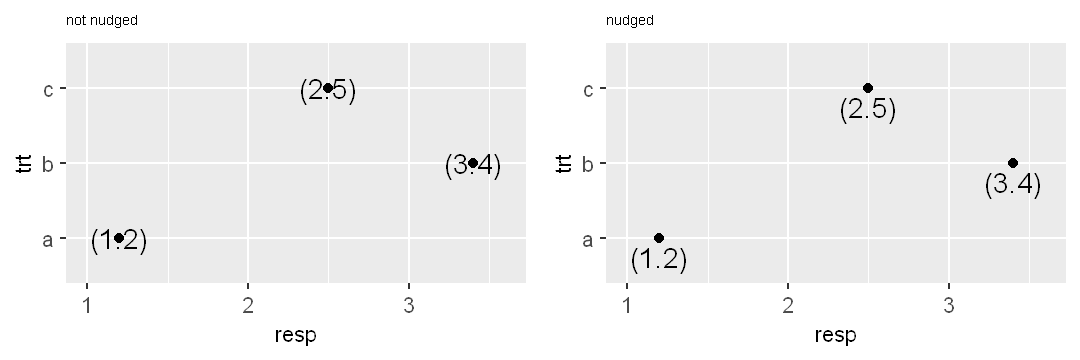

In [4]:
df <- data.frame(trt = c("a", "b", "c"), resp = c(1.2, 3.4, 2.5))
p1 <- ggplot(df, aes(resp, trt)) + 
geom_point() + 
geom_text(aes(label = paste0("(", resp, ")"))) + 
xlim(1, 3.6) +
ggtitle('not nudged') + myTheme
p2 <- ggplot(df, aes(resp, trt)) + 
geom_point() + 
geom_text(aes(label = paste0("(", resp, ")")), nudge_y = -0.25) + 
xlim(1, 3.6) +
ggtitle('nudged') + myTheme
multiplot(p1,p2,ncol = 2)

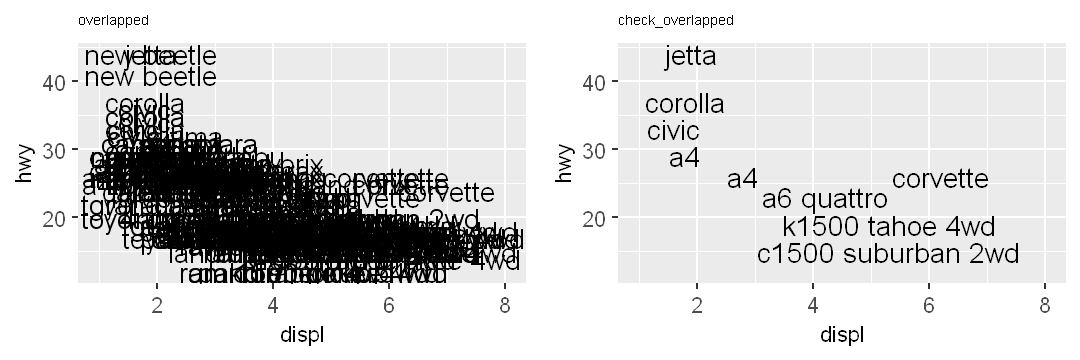

In [5]:
p1 <- ggplot(mpg, aes(displ, hwy)) + 
geom_text(aes(label = model)) + 
xlim(1, 8) +
ggtitle('overlapped') + myTheme
p2 <- ggplot(mpg, aes(displ, hwy)) + 
geom_text(aes(label = model), check_overlap = TRUE) + 
xlim(1, 8) +
ggtitle('check_overlapped') + myTheme
multiplot(p1,p2,ncol = 2)

### Alternatives

We also have `geom_label()` which draws a rounded rectangle behind the text.

And `ggrepel::geom_text_repel()` could optimize the label positioning to avoid overlap. Similar one like package `ggfittext` is also helpful.

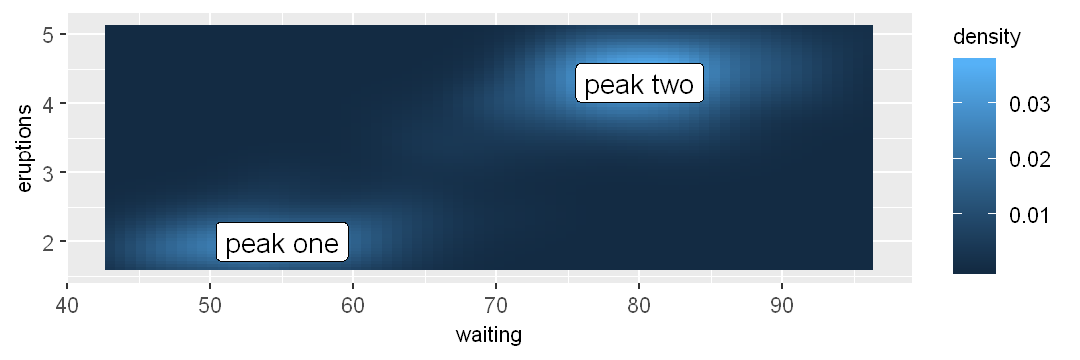

In [6]:
label <- data.frame(
  waiting = c(55, 80), 
  eruptions = c(2, 4.3), 
  label = c("peak one", "peak two")
)

ggplot(faithfuld, aes(waiting, eruptions)) +
geom_tile(aes(fill = density)) + 
geom_label(data = label, aes(label = label)) + myTheme

## Building custom annotations

- `geom_text()` and `geom_label()` add texts
- `geom_rect()` add a rectangular with `xmin`, `xmax`, `ymin` and `ymax`. Can generate a shading.
- `geom_line()`, `geom_path()` and `geom_segment()` add lines, with parameter `arrow=arrow()`. You can put `angle`, `length`, `ends` and `type` in `arrow()`
- `geom_vline()`, `geom_hline()` and `geom_abline()` add reference lines across the whole plot. Can generate a separator.

Use datasets `economics` and `presidential`

In [7]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958
1967-10-01,512.9,199311,12.5,4.9,3143
1967-11-01,518.1,199498,12.5,4.7,3066
1967-12-01,525.8,199657,12.1,4.8,3018


In [8]:
presidential <- subset(presidential, start > economics$date[1])
head(presidential)

name,start,end,party
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic
Reagan,1981-01-20,1989-01-20,Republican
Bush,1989-01-20,1993-01-20,Republican
Clinton,1993-01-20,2001-01-20,Democratic


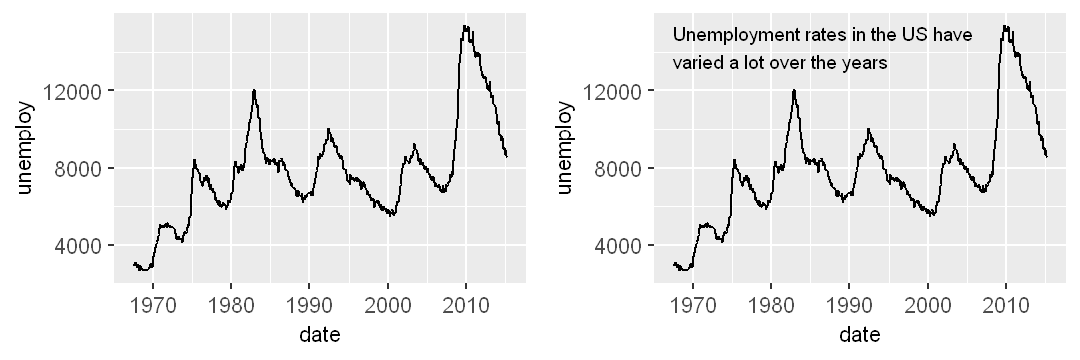

In [9]:
p1 <- ggplot(economics, aes(date, unemploy)) + 
geom_line() + myTheme

yrng <- range(economics$unemploy)
xrng <- range(economics$date)
caption <- paste(strwrap("Unemployment rates in the US have varied a lot over the years", 40), collapse = "\n")

p2 <- ggplot(economics, aes(date, unemploy)) + 
geom_line() + 
geom_text(
    aes(x, y, label = caption), 
    data = data.frame(x = xrng[1], y = yrng[2], caption = caption), 
    hjust = 0, vjust = 1, size = 2.7
) + myTheme

multiplot(p1,p2,ncol = 2)

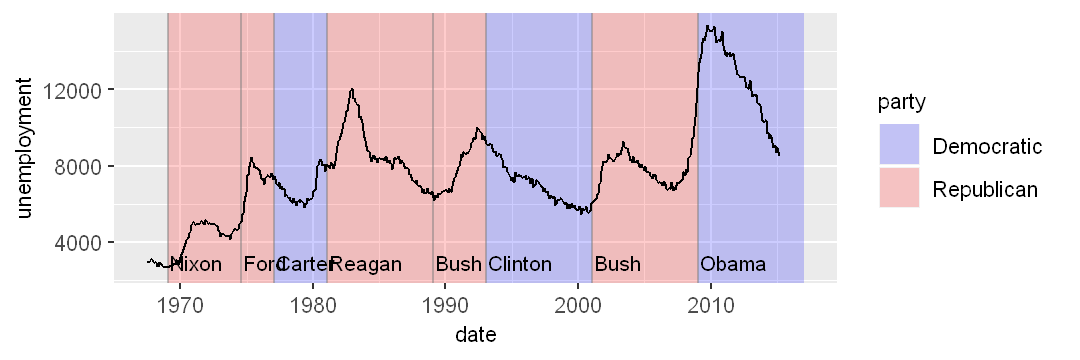

In [10]:
ggplot(economics) + 
geom_rect(
    aes(xmin = start, xmax = end, fill = party), 
    ymin = -Inf, ymax = Inf, alpha = 0.2, 
    data = presidential
) + 
geom_vline(
    aes(xintercept = as.numeric(start)), 
    data = presidential,
    colour = "grey50", alpha = 0.5
) + 
geom_text(
    aes(x = start, y = 2500, label = name), 
    data = presidential, 
    size = 3, vjust = 0, hjust = 0, nudge_x = 50
) + 
geom_line(aes(date, unemploy)) + 
scale_fill_manual(values = c("blue", "red")) +
xlab("date") + 
ylab("unemployment") + myTheme

To avoid adding annotation one by one, use `annotate()`.

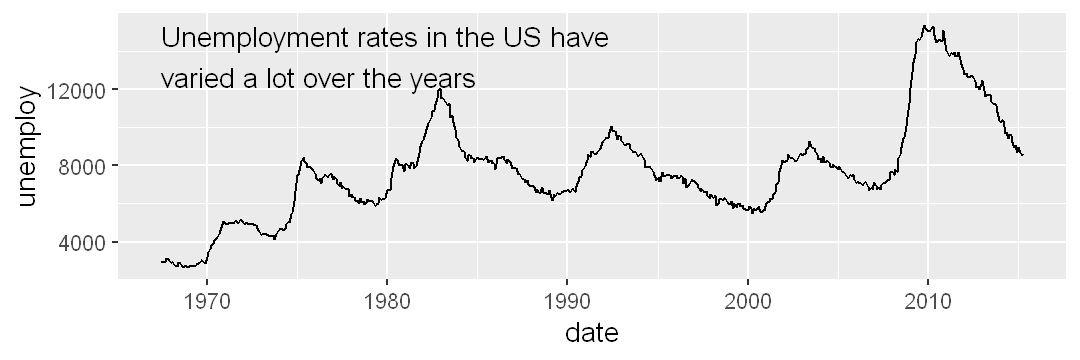

In [11]:
ggplot(economics, aes(date, unemploy)) + 
  geom_line() + 
  annotate(
    geom = "text", x = xrng[1], y = yrng[2], 
    label = caption, hjust = 0, vjust = 1, size = 4
  )

But it seems that `annotate()` can not fully understand data. Use `annotate()` without data input. We'll use dataset `mpg`.

`data = filter(mpg, manufacturer == "subaru")` is from packag `dplyr` but essential R, and will cause a bug.

In [12]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


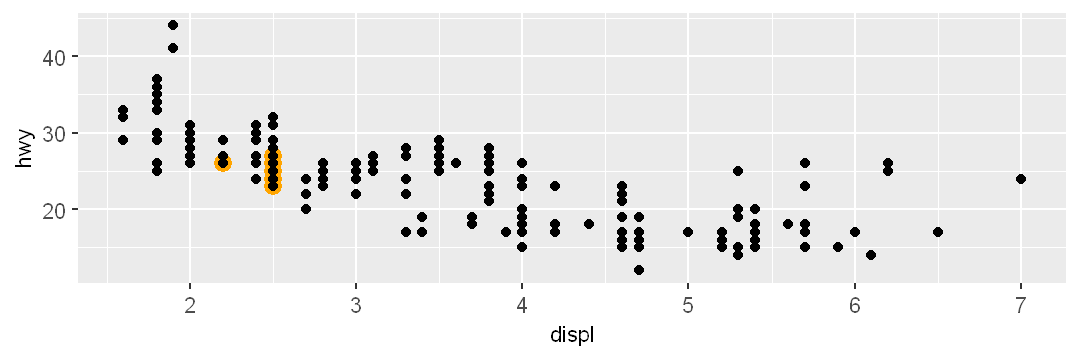

In [13]:
p <- ggplot(mpg, aes(displ, hwy)) +
geom_point(
    data = mpg[mpg[,"manufacturer"]=="subaru",], 
    colour = "orange",
    size = 3
) +
geom_point() + myTheme

p

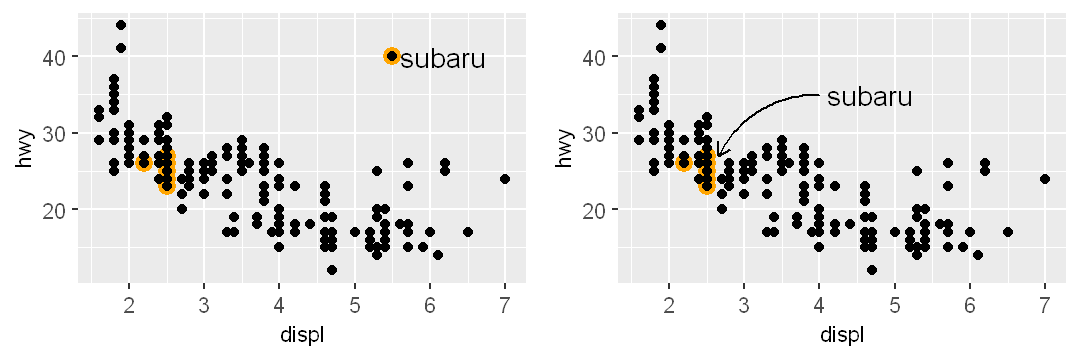

In [14]:
p1 <- p + 
annotate(geom = "point", x = 5.5, y = 40, colour = "orange", size = 3) + 
annotate(geom = "point", x = 5.5, y = 40) + 
annotate(geom = "text", x = 5.6, y = 40, label = "subaru", hjust = "left")

p2 <- p + 
annotate(
    geom = "curve", x = 4, y = 35, xend = 2.65, yend = 27, 
    curvature = .3, arrow = arrow(length = unit(2, "mm"))
) +
annotate(geom = "text", x = 4.1, y = 35, label = "subaru", hjust = "left")

multiplot(p1,p2,ncol=2)

## Direct labelling

The following can help put labels closer to your data

- `directlabels`, by Toby Dylan Hocking
- `ggforce`, by Thomas Lin Pederson
- `gghighlight`, by Hiroaki Yutani 

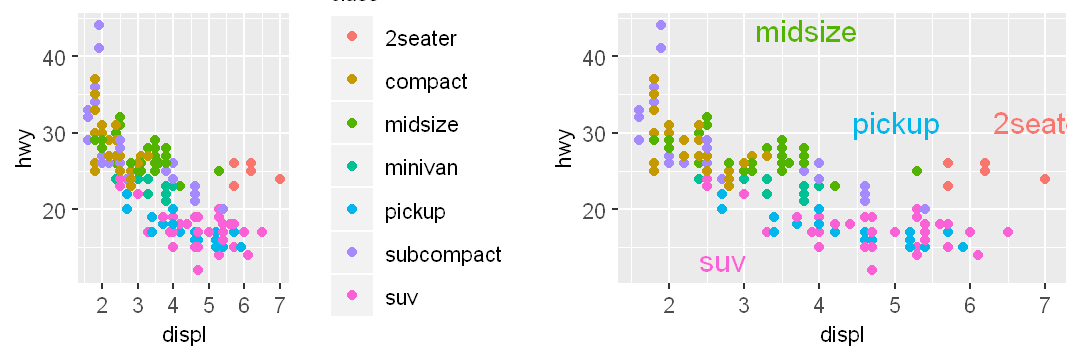

In [15]:
p1 <- ggplot(mpg, aes(displ, hwy, colour = class)) + 
geom_point() + myTheme

p2 <- ggplot(mpg, aes(displ, hwy, colour = class)) + 
geom_point(show.legend = FALSE) +
directlabels::geom_dl(aes(label = class), method = "smart.grid")  + myTheme

multiplot(p1,p2,ncol = 2)

Warning message:
"You set use_group_by = TRUE, but grouped calculation failed.
Falling back to ungrouped filter operation..."Warning message:
"You set use_group_by = TRUE, but grouped calculation failed.
Falling back to ungrouped filter operation..."label_key: Subject


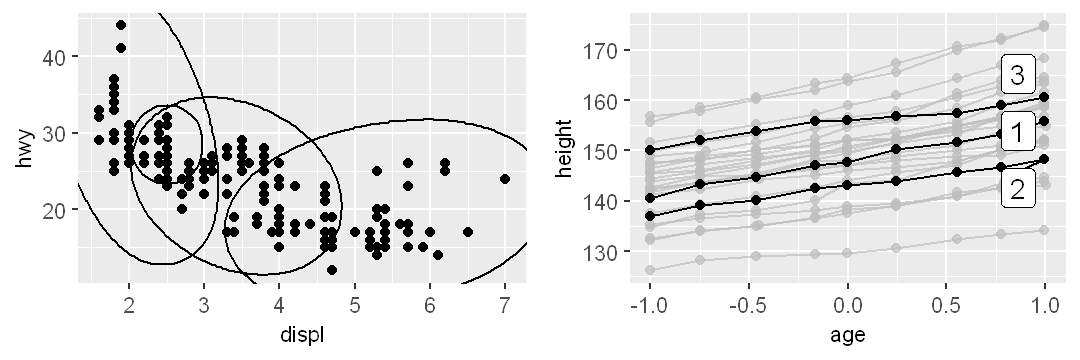

In [16]:
p1 <- ggplot(mpg, aes(displ, hwy)) +
geom_point() + 
ggforce::geom_mark_ellipse(aes(label = cyl, group = cyl)) + myTheme

data(Oxboys, package = "nlme")
p2 <- ggplot(Oxboys, aes(age, height, group = Subject)) + 
geom_line() + 
geom_point() + 
gghighlight::gghighlight(Subject %in% 1:3) + myTheme

multiplot(p1,p2,ncol = 2)

## Annotation across facets



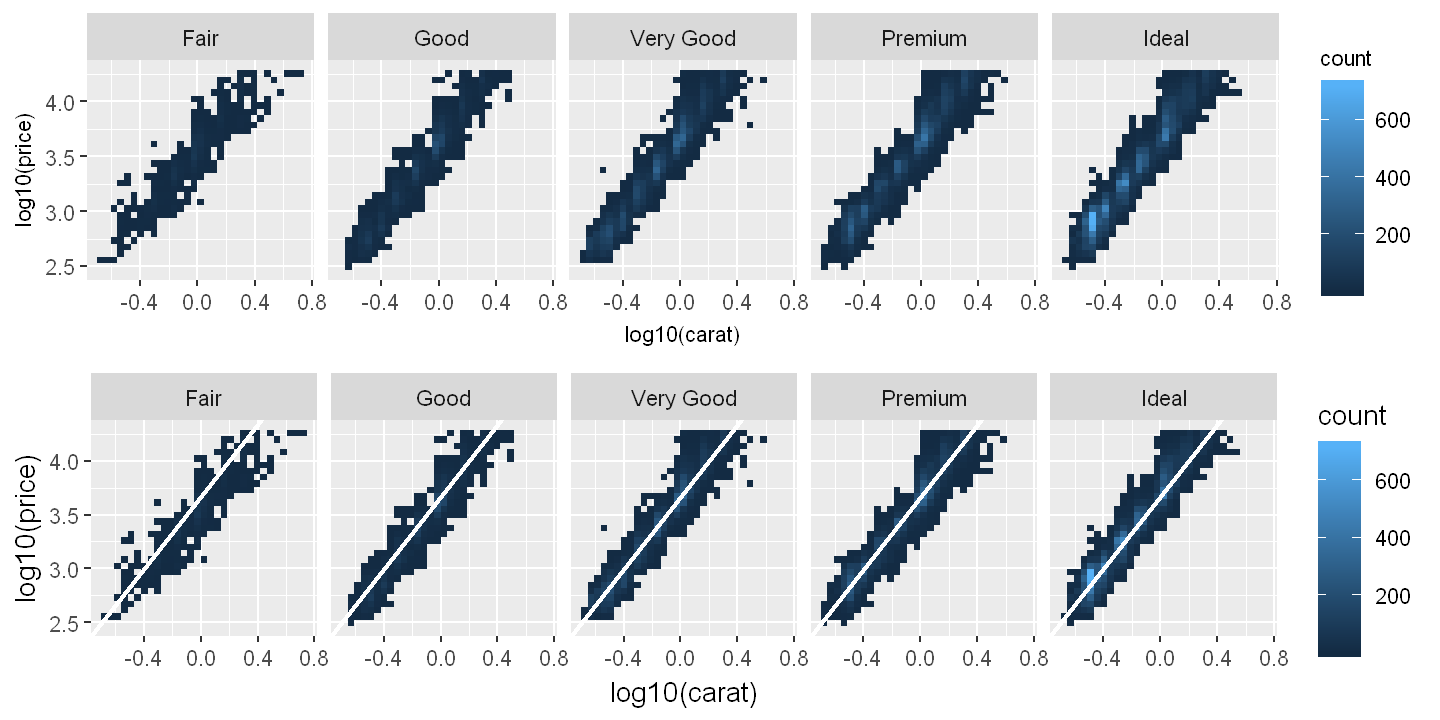

In [17]:
p1 <- ggplot(diamonds, aes(log10(carat), log10(price))) + 
geom_bin2d() + 
facet_wrap(vars(cut), nrow = 1) + myTheme

mod_coef <- coef(lm(log10(price) ~ log10(carat), data = diamonds))
p2 <- ggplot(diamonds, aes(log10(carat), log10(price))) + 
geom_bin2d() + 
geom_abline(intercept = mod_coef[1], slope = mod_coef[2], colour = "white", size = 0.8) + 
facet_wrap(vars(cut), nrow = 1)

multiplot(p1,p2,ncol = 1, width=8)

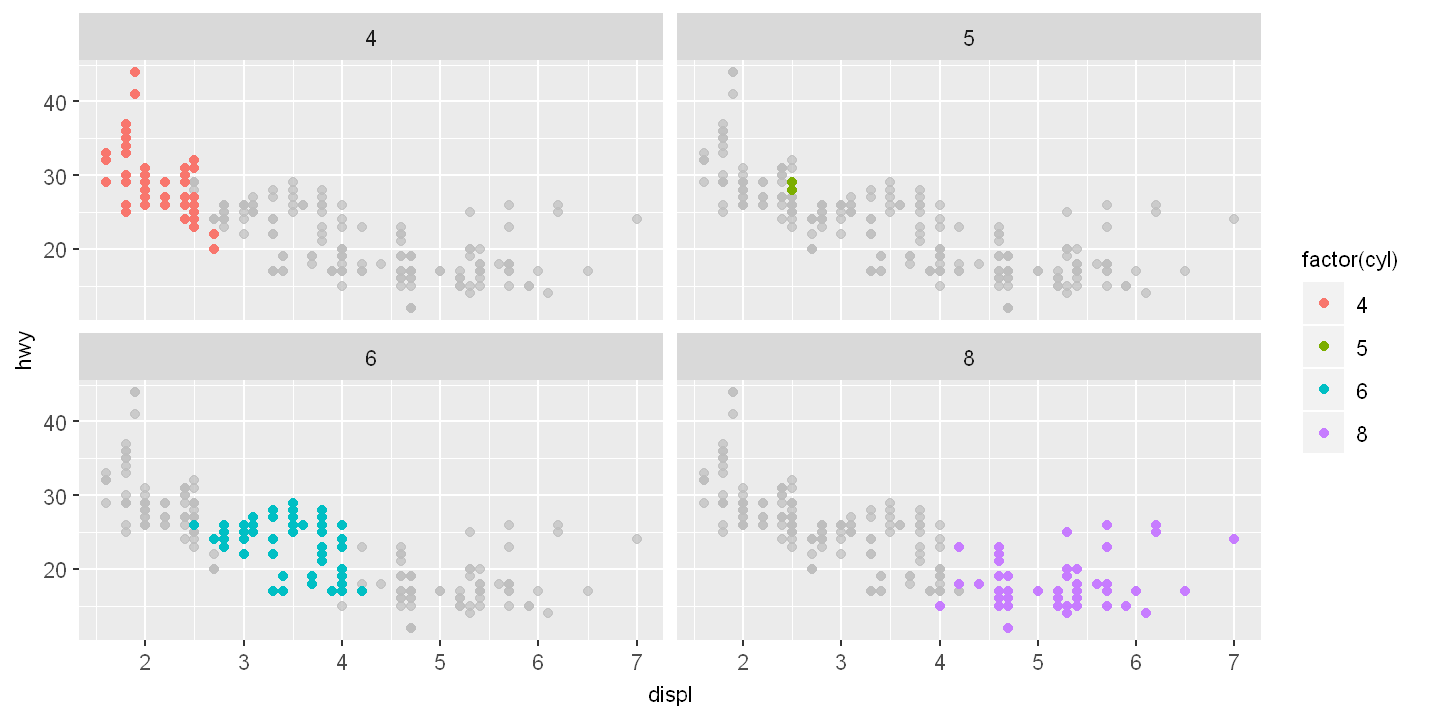

In [18]:
ggplot(mpg, aes(displ, hwy, colour = factor(cyl))) +
geom_point() + 
gghighlight::gghighlight() + 
facet_wrap(vars(cyl))+myTheme